## Ćwiczenie 8

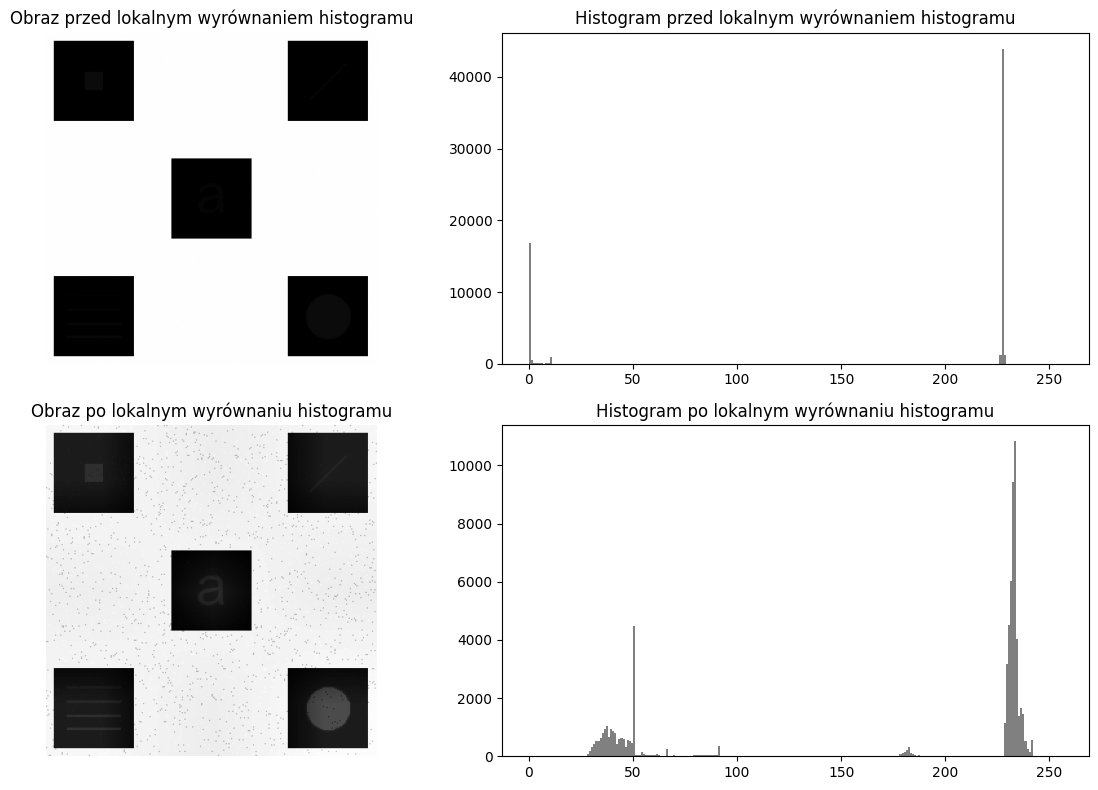

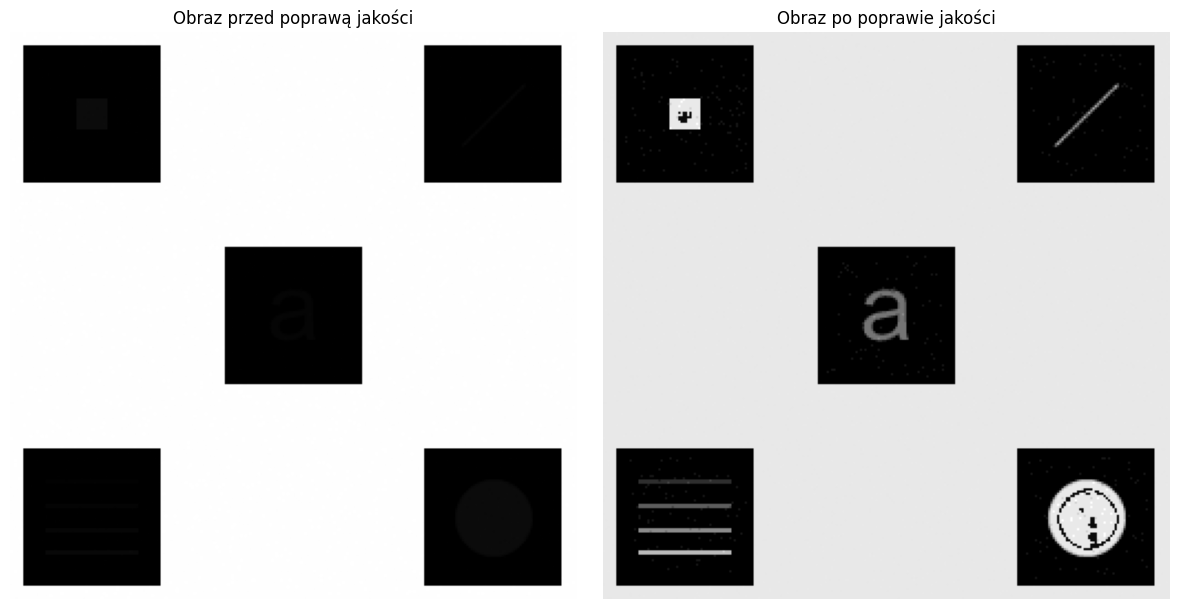

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2



def local_histogram_equalization(image_path, clip_limit, tile_grid_size):
    img = tifffile.imread(image_path)

    img = np.clip(img, 0, 255).astype(np.uint8)
    # to jest jakas metoda podana przez czat ale jest chyba zle, ogolnie tego podpunktu nie do konca rozumiem jak zrobic
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    equalized_img = clahe.apply(img)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Obraz przed lokalnym wyrównaniem histogramu')
    axes[0, 0].axis('off')

    axes[0, 1].hist(img.flatten(), bins=256, range=[0, 256], color='gray')
    axes[0, 1].set_title('Histogram przed lokalnym wyrównaniem histogramu')

    axes[1, 0].imshow(equalized_img, cmap='gray')
    axes[1, 0].set_title('Obraz po lokalnym wyrównaniu histogramu')
    axes[1, 0].axis('off')

    axes[1, 1].hist(equalized_img.flatten(), bins=256, range=[0, 256], color='gray')
    axes[1, 1].set_title('Histogram po lokalnym wyrównaniu histogramu')

    plt.tight_layout()
    plt.show()

    return equalized_img

def local_statistical_enhancement(image_path, C, k0, k1, k2, k3):
    img = tifffile.imread(image_path)

    img = np.clip(img, 0, 255).astype(np.uint8)

    mean_global = np.mean(img)       #globalne statystyki obrazu
    std_global = np.std(img)

    kernel_size = 8  # Rozmiar okna do obliczeń lokalnych statystyk
    mean_local = cv2.blur(img, (kernel_size, kernel_size))      #obliczanie lokalnych statystyk
    local_var = cv2.blur(img**2, (kernel_size, kernel_size)) - mean_local**2
    std_local = np.sqrt(np.maximum(local_var, 0))

    #poprawianie jakosci metoda podana na wykladzie 3. przedostatni slajd
    enhanced_img = np.where(
        (k0 * mean_global <= mean_local) & (mean_local <= k1 * mean_global) & (k2 * std_global <= std_local) & (std_local <= k3 * std_global),
        C * img,
        img
    ).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Obraz przed poprawą jakości')
    axes[0].axis('off')

    axes[1].imshow(enhanced_img, cmap='gray')
    axes[1].set_title('Obraz po poprawie jakości')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    return enhanced_img


image_path = 'pliki/hidden-symbols.tif'

local_equalized_image = local_histogram_equalization(image_path, 50.0, tile_grid_size=(3, 3))

enhanced_image = local_statistical_enhancement(image_path, C=22.8, k0=0, k1=0.1, k2=0, k3=0.1) #parametry z przykładu z wykładu